In [1]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import scipy.optimize as spopt 
import scipy.fftpack as spfft 
import scipy.ndimage as spimg 
import cvxpy as cvx
%matplotlib inline

In [2]:
n = 5000
f1 = 500
f2 = 2600
f3 = 1498
t = np.linspace(0, 1/8, n)
y = np.sin(f1 * np.pi * t) + np.sin(f2 * np.pi * t) + np.sin(f3 * np.pi * t)
yt = spfft.dct(y, norm='ortho')
k = np.linspace(0, 5000,  n)

(0.0, 500.0)

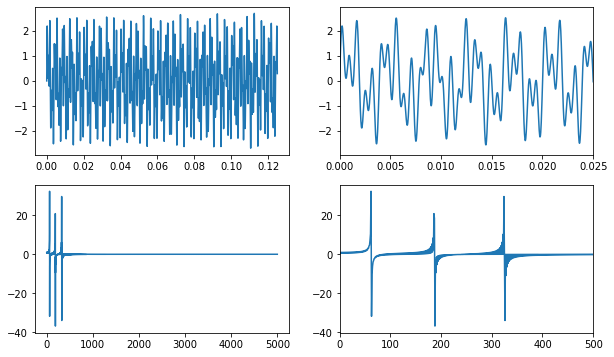

In [3]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(t, y)

plt.subplot(222)
plt.plot(t, y)
plt.xlim([0, 0.025])

plt.subplot(223)
plt.plot(k, yt)

plt.subplot(224)
plt.plot(k, yt)
plt.xlim([0, 500])

In [4]:
m = 500 # 10% sample
ri = np.random.choice(n, m, replace=False) # random sample of indices
ri.sort() # 꼭 필요한 것은 아니지만 플로팅에 편리함
t2 = t[ri]
y2 = y[ri]

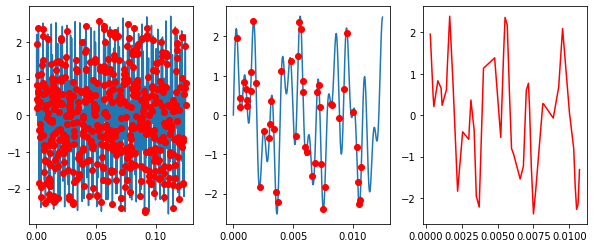

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.plot(t, np.sin(f1 * np.pi * t) + np.sin(f2 * np.pi * t) + np.sin(f3 * np.pi * t))
plt.plot(t2, y2, 'o', c='r')

plt.subplot(132)
plt.plot(t[0:500], np.sin(f1 * np.pi * t[0:500]) + np.sin(f2 * np.pi * t[0:500]) + np.sin(f3 * np.pi * t[0:500]))
plt.plot(t2[0:48], y2[0:48],'o', c='r')

plt.subplot(133)
plt.plot(t2[0:48], y2[0:48], 'r')

In [6]:
# idct 행렬 연산자 만들기
Psi_inv = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = Psi_inv[ri]

# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True); 

                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) May 18 12:13:58 PM: Your problem has 5000 variables, 1 constraints, and 0 parameters.
(CVXPY) May 18 12:13:58 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 18 12:13:58 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 18 12:13:58 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 18 12:13:58 PM: Compiling problem (target solver=ECOS).
(CVXPY) May 18 12:13:58 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

C:\Anaconda\envs\test\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) May 18 12:13:58 PM: Applying reduction ECOS
(CVXPY) May 18 12:13:59 PM: Finished problem compilation (took 1.477e+00 seconds).
(CVXPY) May 18 12:13:59 PM: (Subsequent compilations of this problem, using the same arguments, should take less time.)
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 18 12:13:59 PM: Invoking solver ECOS to obtain a solution.

ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +1.279e-22  -0.000e+00  +2e+04  9e-01  1e-02  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  +2.141e+02  +2.142e+02  +9e+03  8e-01  5e-03  5e-01  9e-01  0.6509  9e-02   1  1  1 |  0  0
 2  +2.224e+02  +2.225e+02  +8e+03  6e-01  4e-03  5e-01 

(0.0, 0.012)

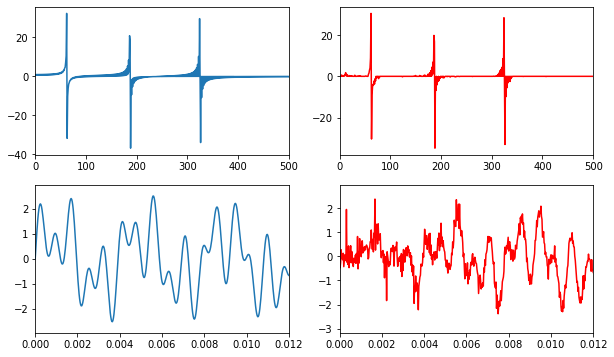

In [7]:
# 신호 재구성
x = np.array(vx.value)
x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)

plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(k, yt)
plt.xlim([0, 500])

plt.subplot(222)
plt.plot(k, x,'r')
plt.xlim([0, 500])

plt.subplot(223)
plt.plot(t, y)
plt.xlim([0, 0.012])

plt.subplot(224)
plt.plot(t, sig,'r')
plt.xlim([0, 0.012])